# Ekplorasi Faktor Penjualan Mobil Terhadap Harga pada Usia, Jarak tempuh, Kondisi, Tipe Transmisi, dan Warnanya.

1. Pada tahap pertama Pra-pemprosesan data:
     a. Memuat Library.
     b. Eksplorasi Data.
     c. Kesimpulan Awal Untuk proses selanjutnya.



2. Pada tahap Explorasi Data / Data Quality Checking
    a. Mengatasi nilai yang hilang
    b. Memperbaiki tipe data
    c. Memperbaiki kualitas data
    d. Memeriksa data yang sudah bersih.



3. Pada tahap Data Cleansing:
    a. Mempelajari Parameter
    b. Menangani outlier



4. Explorasi data terkait dengan faktor penjualan mobil terhadap harga pada Usia, jarak tempuh, kondisi, tipe transmisi dan warnanya. 

## Pra-pemrosesan

Memuat Perpustakan 
1. pandas
2. numpy
3. matplotlin.pyplot
4. datetime

In [2]:
# Muat semua library

# import pandas and numpy untuk proses dan manipulasi data
import pandas as pd
import numpy as np

# import scipy untuk perhitungan statistika zscore
from scipy import stats

# import matplotlib untuk data visualisasi
import matplotlib.pyplot as plt 
%matplotlib inline

# Import seaborn for statistika data visualisasi
import seaborn as sns

# import date dan time untuk merubah tipe data
import time
import datetime
from datetime import datetime

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

### Memuat Data

Memuat Data dari pandas menjadi DataFrame

In [3]:
# Muat file data menjadi DataFrame
try: 
  data = pd.read_csv('/datasets/vehicles_us.csv')

except:
  data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/My Project Practicum/Project Vehicles by Practicum Not valid/vehicles_us.csv')
 
  

### Mengeksplorasi Data Awal

*Dataset* Anda berisi kolom-kolom berikut: 


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan 
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus


In [4]:
# tampilkan informasi/rangkuman umum tentang DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
# tampilkan sampel data

data.sample(frac=2, replace=True, random_state=1)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
33003,4295,2004.0,chevrolet suburban,good,8.0,gas,NaN,automatic,SUV,NaN,1.0,2019-03-13,22
12172,1,2016.0,ram 3500,excellent,10.0,gas,43200.0,other,truck,white,1.0,2018-05-13,24
5192,2999,2004.0,toyota sienna,like new,6.0,gas,185696.0,automatic,mini-van,grey,NaN,2019-02-26,20
32511,15995,2016.0,chevrolet camaro lt coupe 2d,like new,6.0,gas,30000.0,manual,coupe,black,NaN,2018-07-09,44
50057,5900,2005.0,toyota highlander,good,6.0,gas,195643.0,automatic,SUV,silver,1.0,2018-05-16,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44639,3900,NaN,ford f250 super duty,fair,8.0,gas,82300.0,automatic,truck,white,1.0,2018-10-26,94
28674,15500,2007.0,toyota tundra,excellent,8.0,gas,162000.0,automatic,offroad,white,1.0,2018-11-02,58
36544,7995,2005.0,chrysler 300,good,8.0,gas,183080.0,automatic,sedan,grey,NaN,2018-12-24,6
4949,16395,2017.0,ford escape,excellent,4.0,gas,NaN,automatic,SUV,NaN,1.0,2018-06-21,109


Kesimpulan awal :

Dari hasil sampel data terdapat nilai yang hilang, sehingga mungkin memerlukan identifikasi pada data lebih lanjut.


In [6]:
# Memeriksa column yang tidak sesuai dengan tipe datanya

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Kesimpulan awal :

1. Terdapat tipe data yang tidak sesuai yaitu date_posted dengan tipe data object, yang seharusnya tipe data timestamp.

In [7]:
# Menampilkan Column dengan jumlah nilai yang hilang

data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [8]:
# Memeriksa jumlah panjang baris column pada Dataset

data.shape

(51525, 13)

Kesimpulan awal:

Terdapat nilai yang hilang di beberapa column dengan jumlah nilai column yang hilang terbesar  25953

Memfilter dataset berdasarkan column yang teridentifikasi nilai yang hilang apakah terdapat pola atau hilang secara acak. 

In [9]:
# Filter Data yang hilang berdasarkan column yang nilainya teridentifikasi terdapat nilai yang hilang

data.loc[(data['model_year'].isna()) & (data['cylinders'].isna())]


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
159,23300,NaN,nissan frontier crew cab sv,good,NaN,gas,NaN,other,pickup,grey,1.0,2018-07-24,73
370,4700,NaN,kia soul,good,NaN,gas,NaN,manual,sedan,white,NaN,2019-01-14,50
418,4998,NaN,toyota corolla,good,NaN,gas,44442.0,automatic,sedan,grey,NaN,2019-04-19,12
664,5000,NaN,toyota highlander,excellent,NaN,gas,NaN,automatic,SUV,blue,NaN,2018-06-27,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50643,21499,NaN,ram 2500,good,NaN,diesel,165831.0,manual,truck,red,1.0,2018-08-14,91
50836,39488,NaN,ford f350,like new,NaN,gas,32000.0,automatic,truck,NaN,1.0,2018-06-23,6
50924,1999,NaN,jeep grand cherokee laredo,good,NaN,gas,199312.0,automatic,SUV,blue,1.0,2019-01-05,69
51125,20900,NaN,ford f-150,excellent,NaN,gas,53209.0,automatic,pickup,NaN,1.0,2018-08-04,87


In [10]:
# Filter Data hilang berdasarkan column odometer yang teridentifikasi terdapat nilai yang hilang

data.loc[(data['model_year'].isna()) & (data['odometer'].isna())]


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
159,23300,NaN,nissan frontier crew cab sv,good,NaN,gas,NaN,other,pickup,grey,1.0,2018-07-24,73
260,14975,NaN,toyota 4runner,good,6.0,gas,NaN,automatic,SUV,silver,NaN,2018-05-13,57
370,4700,NaN,kia soul,good,NaN,gas,NaN,manual,sedan,white,NaN,2019-01-14,50
586,26000,NaN,toyota rav4,like new,4.0,gas,NaN,automatic,SUV,NaN,NaN,2018-08-09,29
659,8400,NaN,volkswagen jetta,good,4.0,diesel,NaN,manual,wagon,NaN,NaN,2018-10-22,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51195,21999,NaN,ram 2500,good,6.0,diesel,NaN,automatic,truck,white,1.0,2018-05-10,35
51222,1000,NaN,acura tl,good,6.0,gas,NaN,automatic,sedan,grey,NaN,2018-12-09,23
51257,6500,NaN,toyota corolla,good,4.0,gas,NaN,automatic,sedan,white,NaN,2018-10-16,75
51295,3850,NaN,hyundai elantra,excellent,4.0,gas,NaN,automatic,sedan,silver,NaN,2019-03-16,83


In [11]:
# Filter Data hilang berdasarkan column paint color yang teridentifikasi terdapat nilai yang hilang

data.loc[(data['model_year'].isna()) & (data['paint_color'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
116,25300,NaN,chevrolet camaro lt coupe 2d,good,6.0,gas,3568.0,other,coupe,NaN,NaN,2018-06-16,34
165,22000,NaN,ford f350 super duty,good,8.0,diesel,163000.0,automatic,truck,NaN,1.0,2019-02-05,38
397,14995,NaN,chevrolet camaro,excellent,8.0,gas,95000.0,automatic,coupe,NaN,NaN,2018-06-29,15
443,2025,NaN,chevrolet tahoe,good,8.0,gas,151000.0,automatic,SUV,NaN,1.0,2018-10-24,31
586,26000,NaN,toyota rav4,like new,4.0,gas,NaN,automatic,SUV,NaN,NaN,2018-08-09,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51312,1800,NaN,hyundai santa fe,good,6.0,gas,287000.0,automatic,SUV,NaN,NaN,2018-12-13,100
51339,19890,NaN,toyota tundra,excellent,8.0,gas,127405.0,automatic,truck,NaN,1.0,2019-02-02,69
51385,3495,NaN,jeep liberty,good,6.0,gas,129644.0,automatic,wagon,NaN,1.0,2018-08-22,28
51396,14995,NaN,ford f-150,good,8.0,gas,123676.0,automatic,truck,NaN,1.0,2018-07-12,13


In [12]:
# Filter Data hilang berdasarkan column is_4wd yang teridentifikasi terdapat nilai yang hilang

data.loc[(data['model_year'].isna()) & (data['is_4wd'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
84,4995,NaN,hyundai elantra,like new,4.0,gas,151223.0,automatic,sedan,custom,NaN,2018-09-15,1
116,25300,NaN,chevrolet camaro lt coupe 2d,good,6.0,gas,3568.0,other,coupe,NaN,NaN,2018-06-16,34
164,2500,NaN,toyota camry,good,6.0,gas,150000.0,automatic,sedan,silver,NaN,2018-06-13,68
186,3000,NaN,honda accord,good,6.0,gas,204000.0,automatic,coupe,blue,NaN,2018-05-18,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51357,7995,NaN,toyota prius,excellent,4.0,hybrid,106250.0,automatic,hatchback,red,NaN,2019-01-28,24
51378,5495,NaN,honda civic,excellent,4.0,gas,130000.0,automatic,sedan,brown,NaN,2018-06-17,47
51399,4400,NaN,kia sorento,excellent,6.0,gas,NaN,automatic,SUV,silver,NaN,2018-08-21,23
51411,7995,NaN,ford taurus,excellent,6.0,gas,149462.0,automatic,sedan,silver,NaN,2018-09-16,86


### Kesimpulan dan Langkah-Langkah Selanjutnya

Kesimpulan mengenai data awal :

1. Terdapat nilai yang hilang secara acak (MAR) pada column model_year, cylinders, odometer, paint_color, is_4wd.

2. Terdapat tipe data float yang harus harus di konversi ke tipe data int

3. Jika nilai yang hilang berada pada tipe data kategorik dan nilai yang hilang teridentifikasi secara acak, maka penanganan pada data dapat diganti dengan nilai default seperti string kosong atau teks tertentu dengan pengindeksan boolean serta mengisi dengan nilai yang paling banyak muncul.

4. Jika nilai yang hilang berada pada tipe data kuantitatif maka penanganan pada data dapat menggunakan nilai representatif mean atau median untuk mengisi value yang hilang tersebut. lalu jika value tidak memiliki outlier nilai yang hilang dapat diganti dengan mean/ rata-rata, jika value memiliki nilai outlier teridentifikasi signifikan maka nilai yang hilang dapat diganti dengan median. 

5. Kemungkinan Faktor penyebab nilai yang hilang pada column yang teridentifikasi :

    a. Pengguna lupa mengisi column.

    b. Data hilang saat mentransfer secara manual dari database.

    c. Terjadi kesalahan pemrograman.





## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

Mengidentifikasi nilai yang hilang 

In [13]:
# Memeriksa nilai yang hilang pada dataset

data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [14]:
# Fungsi untuk menghitung persentase dari column yang hilang 

def missing_values_table(data):
        # Total nilai yang hilang
        mis_val = data.isnull().sum()
        
        # Persentase nilai yang hilang
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Merubah nama table
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Nilai yang hilang', 1 : '% Total Nilai dataset'})
        
        # Mengurutkan table berdasarkan persentase tertinggi
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% Total Nilai dataset', ascending=False).round(1)
        
        # Menampilkan beberapa informasi
        print ("Dataset yang dipilih " + str(data.shape[1]) + "  column.\n"      
            "Terdapat " + str(mis_val_table_ren_columns.shape[0]) +
              " column yang memiliki nilai yang hilang.")
        
        # Return dataset dengan nilai yang hilang
        return mis_val_table_ren_columns

In [15]:
# Menampilkan hasil dari fungsi

missing_values_table(data)

Dataset yang dipilih 13  column.
Terdapat 5 column yang memiliki nilai yang hilang.


,Nilai yang hilang,% Total Nilai dataset
is_4wd,25953,50.4
paint_color,9267,18.0
odometer,7892,15.3
cylinders,5260,10.2
model_year,3619,7.0


In [16]:
# Memeriksa Distribusi statistik dataset
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


1.  Mengatasi nilai-nilai yang hilang pada column is_4wd



In [17]:
# Memeriksa nilai yang unik pada column is_4wd

data['is_4wd'].sort_values().unique()

array([ 1., nan])

In [18]:
# Mempelajari nilai yang hilang pada column s_4wd

data['is_4wd'].value_counts(dropna=False)

NaN    25953
1.0    25572
Name: is_4wd, dtype: int64

In [19]:
# Melihat distribusi nilai pada column is_4wd

data['is_4wd'].describe()

count    25572.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: is_4wd, dtype: float64

Kesimpulan: 

Setelah memeriksa nilai yang hilang kita pada column is_4wd  dengan tipe data kategoris, dimana terdapat 50% nilai yang hilang dimana nilai tersebut merepresentasikan bahwa kendaaraan yang tidak merupakan 4wd, dimana True adalah 1 dan False adalah 0. maka dari itu kita akan mengisi nilainya dengan false atau 0

In [20]:
# Mengisi nilai yang hilang pad column is_4wd 

data['is_4wd'].fillna(0, inplace = True)

In [21]:
# Memeriksa nilai yang hilang setelah di isi dengan value 0

data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


2. Mengidentifikasi Nilai yang hilang dengan mengidentifikasi column lain untuk menjadi referensi 

In [22]:
# Mengidentifikasi price mobil yang tertinggi 

data.loc[data['price'] == 375000]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
12504,375000,1999.0,nissan frontier,good,6.0,gas,115000.0,automatic,pickup,blue,1.0,2018-05-19,21


In [23]:
# Mengidentifikasi Jarak tempuh mobil yang tertinggi 

data.loc[data['odometer']== 990000]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
17869,59900,1964.0,chevrolet corvette,like new,NaN,gas,990000.0,automatic,convertible,red,0.0,2018-06-17,28
40729,4700,2013.0,chevrolet cruze,good,6.0,gas,990000.0,automatic,sedan,black,0.0,2018-05-02,4


a. Dengan menggunakan metode describe, kita dapat mengidentifikasi kesenjangan data, contohnya pada nilai maksimal dari column Price (harga mobil) yakni 375000, dengan memfilter harga tertinggi pada mobil nissan frontier dengan model tahun 1999 dengan jarak tempuh 115000 dimana dapat dilihat pada tabel distribusi statistik dataset nilai maksimal dari column odometer adalah 990000, ini menunjukkan bahwa terdapat nilai yang outlier pada column price, oleh karena itu nilai yang hilang pada column model_year dan cylinders tidak bisa diisi dengan nilai rata-rata / mean sehingga alternatif lain dalam menangani nilai yang hilang kita dapat mengisi nilai median dengan metode conditional imputation. 


b. Untuk nilai yang hilang pada column paint_color dikarenakan tipe datanya kategoris kita tidak dapat mengisinya dengan median, mean pada tipe data categorical, sehingga kita dapat mengisinya dengan kategori baru. 


c. untuk nilai yang hilang pada column odometer dikarenakan terdapat nilai yang outlier, maka kita dapat mengisinya dengan median atau nilai tengah pada distribusi statistik pada column tersebut dengan metode conditional imputation. 



2. Mengatasi nilai yang hilang pada column model_year dengan metode conditional imputation yakni dengan column condition sebagai referensi

In [24]:
# Melihat value pada column condition

sorted(data['condition'].unique())


['excellent', 'fair', 'good', 'like new', 'new', 'salvage']

In [25]:
# Membuat Variable manipulasi unutk menjalankan metode conditional imputation

data_drop = data.dropna()
data_drop.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68


In [26]:
# Menghitung nilai median dari column model_year berdasarkan column condition

print('nilai median dari model_year adalah:')
data_drop.pivot_table(index='condition', values='model_year', aggfunc='median')

nilai median dari model_year adalah:


,model_year
condition,
excellent,2012.0
fair,2003.0
good,2009.0
like new,2014.0
new,2018.0
salvage,2006.0


In [27]:
# Menerapkan nilai median pada column model_year berdasarkan faktor yang telah diidentifikasi

data['model_year'] = data.groupby('condition')['model_year'].transform(lambda x: x.fillna(x.median()))

In [28]:
# Menampilkan column model_year setelah menerapkan metode conditional imputation

data['model_year'].isna().sum()

0

3. Mengatasi nilai yang hilang pada column odometer dengan metode conditional imputation yakni dengan column condition sebagai referensi

In [29]:
# Menghitung nilai median dari column odometer berdasarkan column condition

print('nilai median dari odometer adalah:')
data_drop.pivot_table(index='condition', values='odometer', aggfunc='median')

nilai median dari odometer adalah:


,odometer
condition,
excellent,104174.0
fair,180000.0
good,129000.0
like new,72000.0
new,2600.0
salvage,148000.0


In [30]:
# Menerapkan nilai median pada column odometer berdasarkan faktor yang telah diidentifikasi

data['odometer'] = data.groupby('condition')['odometer'].transform(lambda x: x.fillna(x.median()))

In [31]:
# Menampilkan column odometer setelah menerapkan metode conditional imputation

data['odometer'].isna().sum()

0

4. Mengatasi nilai yang hilang pada column paint_color

In [32]:
# Mengisi nilai yang hilang pada column paint_color dengan string 'others'

data['paint_color'] = data['paint_color'].fillna(value='others')

5. Mengatasi nilai yang hilang pada column cylinders

In [33]:
# Melihat value pada column cylinders

sorted(data['cylinders'].unique())

[3.0, 4.0, 5.0, 6.0, 8.0, nan, 10.0, 12.0]

In [34]:
# Menghitung nilai median dari column cylinders berdasarkan column model

print('nilai median dari cylinders adalah:')
data_drop.pivot_table(index='model', values='cylinders', aggfunc='median')

nilai median dari cylinders adalah:


,cylinders
model,
acura tl,6.0
bmw x5,6.0
buick enclave,6.0
cadillac escalade,8.0
chevrolet camaro,6.0
...,...
toyota sienna,6.0
toyota tacoma,6.0
toyota tundra,8.0


In [35]:
# Menerapkan nilai median pada column odometer berdasarkan faktor yang telah diidentifikasi

data['cylinders'] = data.groupby('model')['cylinders'].transform(lambda x: x.fillna(x.median()))

In [36]:
# Menampilkan column odometer setelah menerapkan metode conditional imputation

data['cylinders'].isna().sum()

0

Menampilkan distribusi nilai statistik pada dataset setalah manipulasi data 

In [37]:
# Melihat distribusi statistik pada dataset setelah manipulasi data :

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Kesimpulan :

setelah kita mengidentifikasi nilai yang hilang pada dataset, kita menggunakan beberapa metode untuk menangani nilai yang hilang berdasarkan kasus perkasus. contohnya kita memanipulasi data dengan metode imputation conditional pada column model_year, cylinders dan mengganti nilai yang hilang menggunakan nilai mediannya dan membuat kategori baru pada column paint_color dengan nama 'others'.



## Memperbaiki Tipe Data

In [38]:
# Memeriksa Tipe Data pada dataset

data.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

Kesimpulan :

Pada poin ini kita memerlukan perubahan pada tipe data yakni dari float64 menjadi int64, column yang tipe datanya perlu dirubah adalah model_year, cylinders, odometer dan is_4wd. alasan perubahan tipe data ini dikarenakan pada saat melakukan aritmatika lebih baik menggunakan bilangan bulat dari pada pecahan atau desimal.


## Memperbaiki kualitas data

Menambahkan beberapa faktor terkait data agar memudahkan dalam menganalisis.

In [39]:
# Merubah column model_year, cylinders, odometer dan is_4wd ke tipe data int64

data['price'] = data['price'].astype('float64')
data['model_year'] = data['model_year'].astype('int64')
data['cylinders'] = data['cylinders'].astype('int64')
data['odometer'] = data['odometer'].astype('float64')
data['is_4wd'] = data['is_4wd'].astype('bool')

In [40]:
# Menampilkan dataset yang telah dirubah tipenya

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  float64
 1   model_year    51525 non-null  int64  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  int64  
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: bool(1), float64(2), int64(3), object(7)
memory usage: 4.8+ MB


In [41]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan

# Merubah tipe data pada  column date_posted menjadi datetime
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d %H:%M:%S', errors='raise')

# Menambahkan table hari, minggu, bulan, dan tahun iklan ditayangkan
data['days'] = data['date_posted'].dt.dayofweek 
data['week'] = data['date_posted'].dt.week 
data['month'] = data['date_posted'].dt.month 
data['year'] = data['date_posted'].dt.year 

In [42]:
# menampilkan nilai waktu dan tanggal pada saat iklan ditayangkan

data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days,week,month,year
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,others,True,2018-06-23,19,5,25,6,2018
1,25500.0,2009,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,42,10,2018
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,6,2,2019
3,1500.0,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,others,False,2019-03-22,9,4,12,3,2019
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,14,4,2019


In [43]:
# Tambahkan usia kendaraan saat iklan ditayangkan

data['vehicle_age'] = (data['year'] - data_drop['model_year']) + 1


In [44]:
# menampilkan statistik pada column usia kendaraan saat iklan ditayangkan

data['vehicle_age'].describe()

count    29916.000000
mean         9.560603
std          6.286292
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max        111.000000
Name: vehicle_age, dtype: float64

In [45]:
# Merubah nilai inf ke NaN dan merubah nilai NaN ke nilai 1 pada column vehicle_age

data['vehicle_age'] = pd.to_numeric(data['vehicle_age'], errors='coerce')
data['vehicle_age'] = data['vehicle_age'].replace(np.inf, int(float(0)))
data['vehicle_age'] = data['vehicle_age'].fillna(1).astype(int)
data['vehicle_age'] = data['vehicle_age'].astype('int64') 

In [46]:
# Menampilkan usia kendaraan saat iklan ditayangkan

data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days,week,month,year,vehicle_age
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,others,True,2018-06-23,19,5,25,6,2018,1
1,25500.0,2009,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,42,10,2018,1
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,6,2,2019,7
3,1500.0,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,others,False,2019-03-22,9,4,12,3,2019,1
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,14,4,2019,3


In [47]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun

data['avg_miles_year'] = (data['odometer'] / data['vehicle_age']) + 1

In [48]:
# menampilkan statistik pada column jarak tempuh rata-rata per tahun

data['avg_miles_year'].describe()

count     51525.000000
mean      56672.249236
std       60615.414651
min           1.000000
25%       11888.500000
50%       20609.285714
75%      104231.000000
max      990001.000000
Name: avg_miles_year, dtype: float64

Setelah kita menampilkan distribusi statistik pada colum jarak tempuh rata-rata per tahun dari kendaraan terdapat nilai NaN sebagai standar deviasi dan inf sebagai mean / rata-rata, hal ini dikarenakan pada column vehicle_age terdapat nilai 0 dimana pada saat menghitung jarak tempuh kendaraan 'odometer' dibagi dengan usia kendaraan 'vehicle_age' mengarah pada nilai NaN atau inf tersebut. sehingga untuk mengatasinya adalah dengan merubah nilai columns 'avg_miles_year' atau dengan mengkonversi inf dan NaN tersebut ke nilai 1 dengan tipe data interger, sehingga nilai inf dan NaN tersebut dapat digantikan dengan 1.


In [49]:
# Merubah nilai inf ke NaN dan merubah nilai NaN ke nilai 1 pada tipe data interger

data['avg_miles_year'] = pd.to_numeric(data['avg_miles_year'], errors='coerce')
data['avg_miles_year'] = data['avg_miles_year'].replace(np.inf, int(float(0)))
data['avg_miles_year'] = data['avg_miles_year'].fillna(1).astype(int)
data['avg_miles_year'] = data['avg_miles_year'].astype('int64') 

In [50]:
# menampilkan statistik pada column jarak tempuh rata-rata per tahun setelah di manipulasi

data['avg_miles_year'].describe()

count     51525.000000
mean      56672.042445
std       60615.553841
min           1.000000
25%       11888.000000
50%       20609.000000
75%      104231.000000
max      990001.000000
Name: avg_miles_year, dtype: float64

In [51]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah

data['condition'] = data['condition'].replace(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'], [5, 4, 3, 2, 1, 0])

In [52]:
# Menampilkan Dataset yang telah dimanipulasi 

data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days,week,month,year,vehicle_age,avg_miles_year
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,others,True,2018-06-23,19,5,25,6,2018,1,145001
1,25500.0,2009,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,42,10,2018,1,88706
2,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,6,2,2019,7,15715
3,1500.0,2003,ford f-150,1,8,gas,181613.0,automatic,pickup,others,False,2019-03-22,9,4,12,3,2019,1,181614
4,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,14,4,2019,3,26968


Kesimpulan :

Pada Poin ini kita berhasil menambahkan :

1. Hari, minggu, bulan, dan tahun kendaraan saat iklan ditayangkan
2. Usia kendaraan (dalam tahun) ketika iklan ditayangkan
3. Jarak tempuh rata-rata kendaraan per tahun 
4. Mengganti nilai string dengan skala numerik pada column condition


## Memeriksa Data yang Sudah Bersih

In [53]:
# tampilkan informasi/rangkuman umum tentang DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51525 non-null  float64       
 1   model_year      51525 non-null  int64         
 2   model           51525 non-null  object        
 3   condition       51525 non-null  int64         
 4   cylinders       51525 non-null  int64         
 5   fuel            51525 non-null  object        
 6   odometer        51525 non-null  float64       
 7   transmission    51525 non-null  object        
 8   type            51525 non-null  object        
 9   paint_color     51525 non-null  object        
 10  is_4wd          51525 non-null  bool          
 11  date_posted     51525 non-null  datetime64[ns]
 12  days_listed     51525 non-null  int64         
 13  days            51525 non-null  int64         
 14  week            51525 non-null  int64         
 15  mo

In [54]:
# tampilkan sampel data

data.sample(frac=2, replace=True, random_state=1)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days,week,month,year,vehicle_age,avg_miles_year
33003,4295.0,2004,chevrolet suburban,2,8,gas,129000.0,automatic,SUV,others,True,2019-03-13,22,2,11,3,2019,1,129001
12172,1.0,2016,ram 3500,3,10,gas,43200.0,other,truck,white,True,2018-05-13,24,6,19,5,2018,3,14401
5192,2999.0,2004,toyota sienna,4,6,gas,185696.0,automatic,mini-van,grey,False,2019-02-26,20,1,9,2,2019,16,11607
32511,15995.0,2016,chevrolet camaro lt coupe 2d,4,6,gas,30000.0,manual,coupe,black,False,2018-07-09,44,0,28,7,2018,3,10001
50057,5900.0,2005,toyota highlander,2,6,gas,195643.0,automatic,SUV,silver,True,2018-05-16,26,2,20,5,2018,14,13975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44639,3900.0,2003,ford f250 super duty,1,8,gas,82300.0,automatic,truck,white,True,2018-10-26,94,4,43,10,2018,1,82301
28674,15500.0,2007,toyota tundra,3,8,gas,162000.0,automatic,offroad,white,True,2018-11-02,58,4,44,11,2018,12,13501
36544,7995.0,2005,chrysler 300,2,8,gas,183080.0,automatic,sedan,grey,False,2018-12-24,6,0,52,12,2018,14,13078
4949,16395.0,2017,ford escape,3,4,gas,104230.0,automatic,SUV,others,True,2018-06-21,109,3,25,6,2018,1,104231


## Mempelajari Parameter Inti pada column :

- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder
- Kondisi

Memeriksa korelasi pada column harga, usia kendaraan ketika iklan ditayangkan, Jarak tempuh, Jumlah silinder, Kondisi.

In [55]:
# Menampilakan korelasi pada column harga, usia kendaraan ketika iklan ditayangkan, rata-rata umur jarak tempuh kendaraan pertahun, Jumlah silinder, Kondisi.

data[['price','model_year', 'condition', 'cylinders', 'vehicle_age','days_listed', 'avg_miles_year']].corr()


,price,model_year,condition,cylinders,vehicle_age,days_listed,avg_miles_year
price,1.000000,0.418347,0.221518,0.300342,-0.242747,-0.000682,-0.120768
model_year,0.418347,1.000000,0.295711,-0.142475,-0.595968,-0.005239,-0.083427
condition,0.221518,0.295711,1.000000,-0.065661,-0.158569,-0.002404,-0.132789
cylinders,0.300342,-0.142475,-0.065661,1.000000,0.091976,0.003181,0.019955
vehicle_age,-0.242747,-0.595968,-0.158569,0.091976,1.000000,0.005013,-0.576436
days_listed,-0.000682,-0.005239,-0.002404,0.003181,0.005013,1.000000,-0.003438
avg_miles_year,-0.120768,-0.083427,-0.132789,0.019955,-0.576436,-0.003438,1.000000


<div class="alert alert-danger">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Daripada menggunakan `odometer` sebagai parameter inti, `avg_mileage` akan lebih baik karena mempertimbangkan usia kendaraan sehingga perbandingan yang dilakukan akan lebih fair.

<div class="alert alert-block alert-info">
<b> Parameter inti sudah diganti menggunakan avg_miles.</b> <a class="tocSkip"></a>
</div>

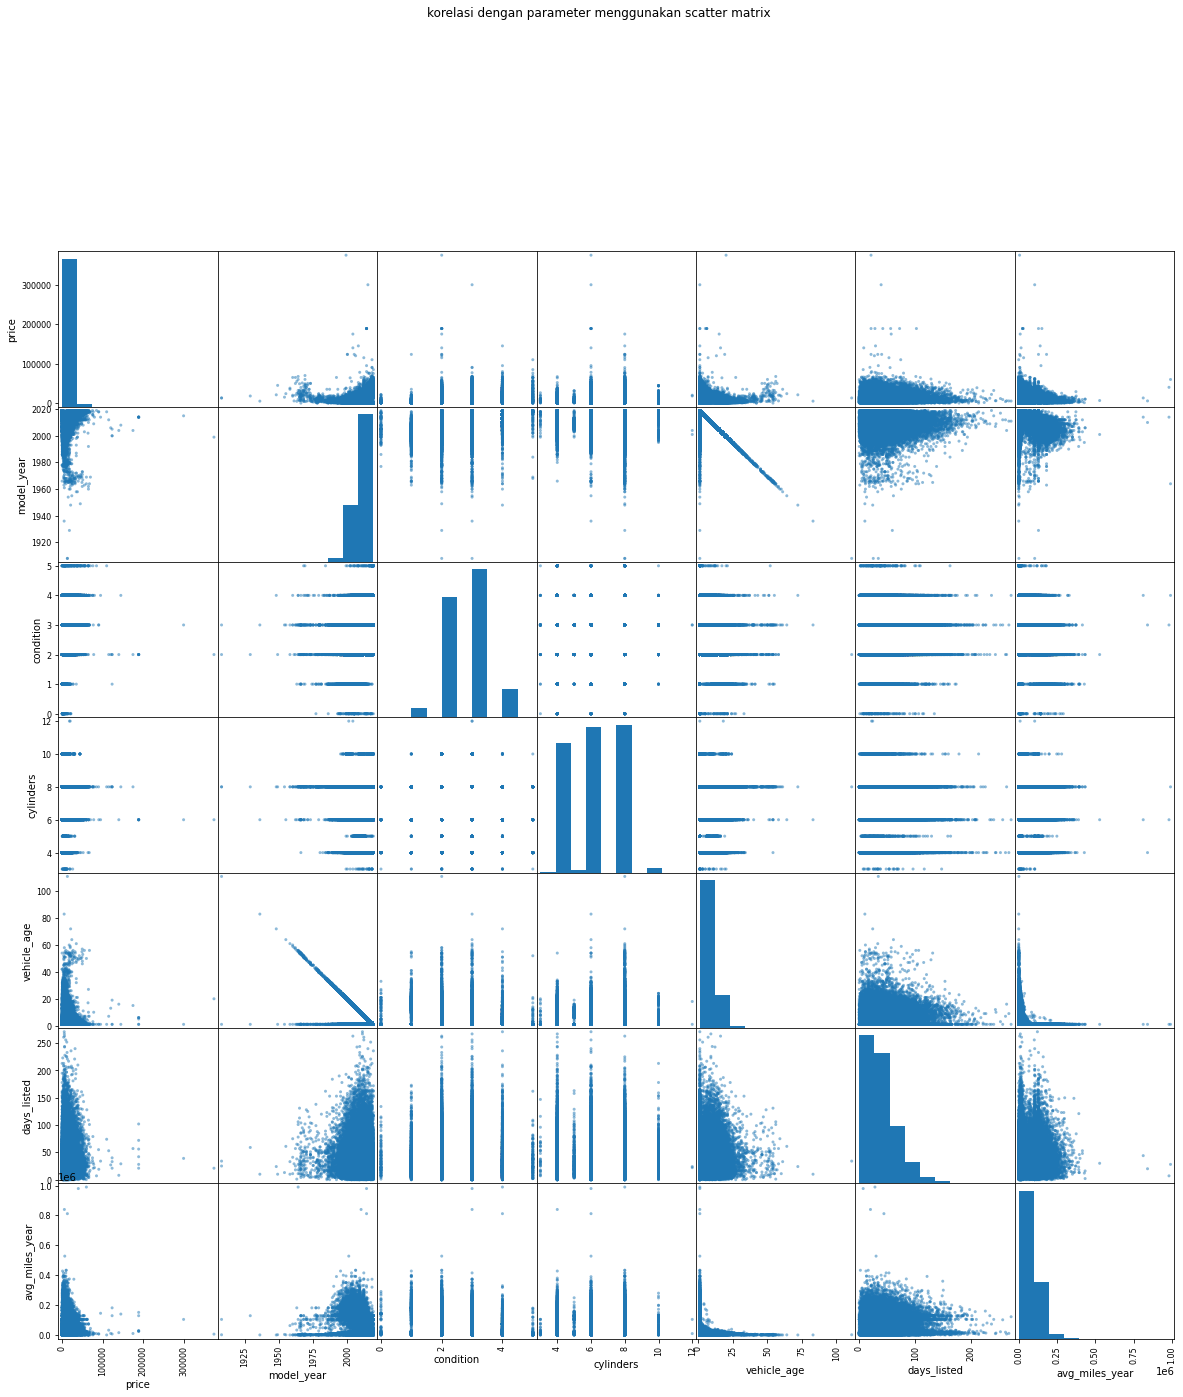

In [56]:
# Menampilkan korelasi pada column harga, usia kendaraan ketika iklan ditayangkan, rata-rata umur jarak tempuh kendaraan pertahun, Jumlah silinder, Kondisi dengan menggunakan scatter matrix

data_corr = data[['price','model_year', 'condition', 'cylinders', 'vehicle_age','days_listed', 'avg_miles_year']]
pd.plotting.scatter_matrix(data_corr, figsize=(20, 20)) 
plt.suptitle('korelasi dengan parameter menggunakan scatter matrix', y=1.05);
plt.show()

Disini kita dapat melihat sel dari grid yang menunjukkan korelasi / hubungan antar column : 

1. sel kiri pertama menampilkan hubungan antara harga dan harga, pada cel histogramnya menunjukkan distribusi statistik haraga paling tinggi adalah diatas 300000, untuk detailnya akan dilihat pada bagian selanjutnya.

2. sel kiri kedua menampilkan hubungan antara harga dan rata-rata umur jarak tempuh kendaraan pertahun dimana titik scatter tersebar dengan padat diantara 0 - 4 tahun.

3. sel kiri ketiga menampilkan hubungan antara harga dan rata-rata umur kendaraan dimana titik scatter tersebar dengan padat diantara 0.0 - 0.2.

4. sel kiri keempat menampilkan hubungan harga dan jumlah silinder dimana titik scatter menunjukkan jumlah silinder 6 - 8 lebih banyak dipilih dibandingkan dengan jumlah silinder yang lain.

5. sel kiri kelima menampilka hubungan harga dengan kondisi kendaraan dimana titik scatter menunjukkan kondisi kendaraan dengan harga  5 = new, 4= like new, 3=excelent, 2=good lebih banyak dipilih dibandingkan dengan kondisi 1=fair, 0=salvage.  

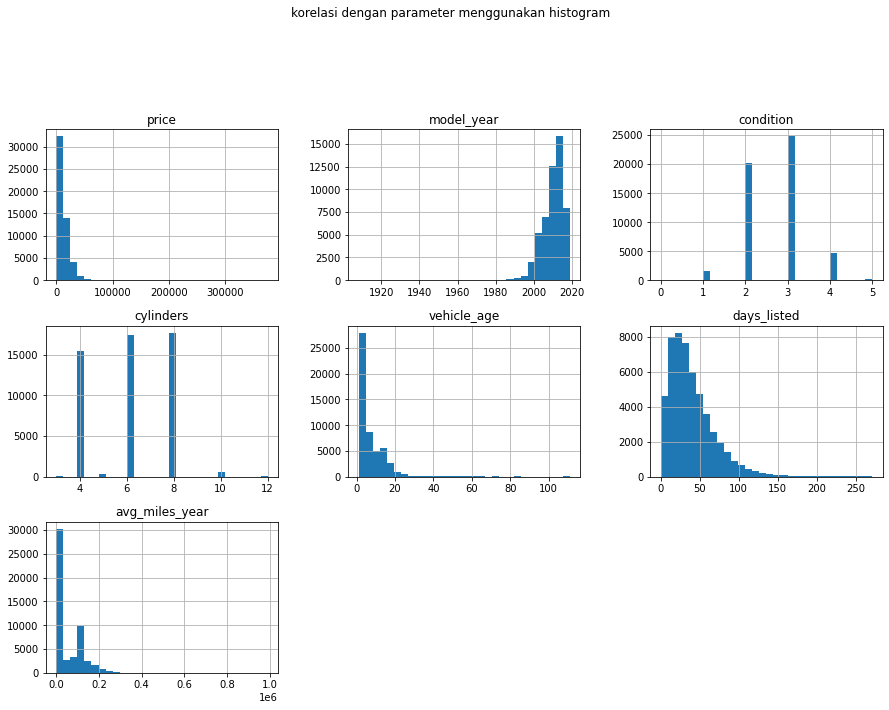

In [57]:
# Menampilkan korelasi pada column harga, usia kendaraan ketika iklan ditayangkan, rata-rata umur jarak tempuh kendaraan, Jumlah silinder, Kondisi dengan menggunakan Histogram 

data_corr.hist(bins=30, figsize=(15, 10))
plt.suptitle('korelasi dengan parameter menggunakan histogram', y=1.05);
plt.show()


Mari kita lihat parameter dengan lebih detail

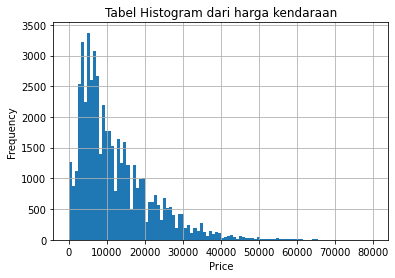

In [58]:
# Menampilkan histogram dari harga dengan detail
data['price'].hist(bins=100, range=[0, 80000])

# menambahkan judul dan nama sumbu 
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title("Tabel Histogram dari harga kendaraan");

Histogram diatas menunjukkan sebaran data dalam colum harga, histogram ini menunjukkan penyebaran menanjak dari kiri dan menurun di kanan, dimana sebagian besar mobil jatuh pada harga rendah - menengah. Histogram tertinggi berada pada frekuensi diatas 2500. frekunsi atau sebaran data berkisar dari 1 hingga 375000 dengan median 9000. dapat disimpulkan data pada column price memiliki outlier yang signifikan.

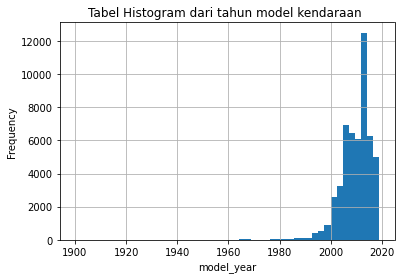

In [59]:
## Menampilkan histogram dari umur kendaraan dengan detail
data['model_year'].hist(bins=50, range=[1900, 2019])

# menambahkan judul dan nama sumbu 
plt.xlabel('model_year')
plt.ylabel('Frequency')
plt.title("Tabel Histogram dari tahun model kendaraan ");

Histogram diatas menunjukkan data dalam column model_year dimana data tersebara dari kiri kekanan dengan nilai puncak diatas 12000 dengan rentang nilai 2000 - 2019. 

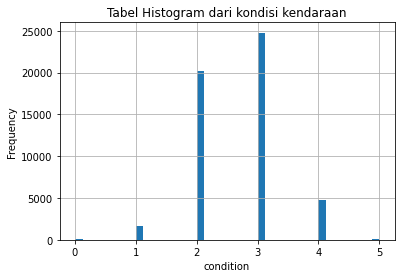

In [60]:
# Menampilkan histogram dari kondisi dengan detail
data['condition'].hist(bins=40)

# menambahkan judul dan nama sumbu 
plt.xlabel('condition')
plt.ylabel('Frequency')
plt.title("Tabel Histogram dari kondisi kendaraan");

Histogram diatas menunjukkan sebaran data dalam column condition dimana data tegak lurus dengan nilai terbanyak pada colum 2 = good, 3= excellent. dengan puncak tertinggi diatas 20000 dengan rentang nilai dari 0 = salvage, 1= fair, 4= like new, 5= new. disini kita dapat menyimpulkan bahwa distribusi memiliki beberapa outlier. 

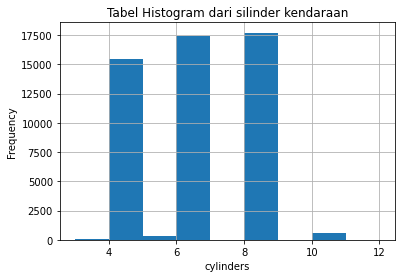

In [61]:
# Menampilkan histogram dari cylinders dengan detail
data['cylinders'].hist(bins= 9)

# menambahkan judul dan nama sumbu 
plt.xlabel('cylinders')
plt.ylabel('Frequency')
plt.title("Tabel Histogram dari silinder kendaraan");


Histogram diatas menunjukkan sebaran data dalam column cylinders dimana data tegak lurus dengan nilai terbanyak pada colum 4, 6, 8. dengan puncak tertinggi diatas 14000. Faktanya sebagian besar kendaraan dalam data mewakili kendaraan yang dibuat dengan 4 silinder, 6 silinder, dan 8 silinder . dapat disimpulkan data pada column jarak tempuh terdapat outlier dimana nilai median dan meannya adalah 6 dan standar deviasinya adalah 1.6.

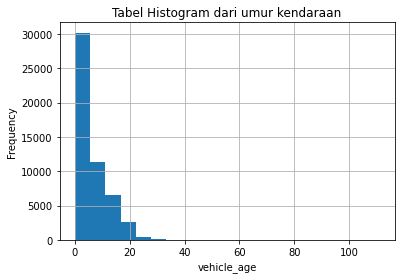

In [62]:
## Menampilkan histogram dari umur kendaraan dengan detail
data['vehicle_age'].hist(bins=20, range=[0, 111])

# menambahkan judul dan nama sumbu 
plt.xlabel('vehicle_age')
plt.ylabel('Frequency')
plt.title("Tabel Histogram dari umur kendaraan");

pada histogram diatas menunjukkan sebaran data pada column umur kendaraan dimana data tersebar dari 1 - 20, dimana nilai puncak nya pada 30000

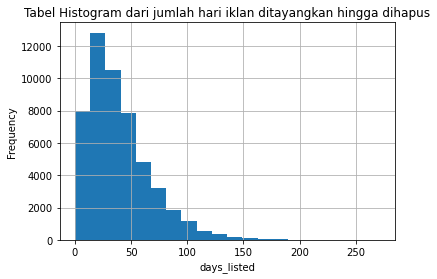

In [63]:
## Menampilkan histogram dari jumlah hari iklan ditayangkan hingga dihapus
data['days_listed'].hist(bins=20, range=[0,  271])

# menambahkan judul dan nama sumbu 
plt.xlabel('days_listed')
plt.ylabel('Frequency')
plt.title("Tabel Histogram dari jumlah hari iklan ditayangkan hingga dihapus");

Pada histogram diatas menunjukkan sebaran data dari jumlah hari iklan ditayangkan hingga dihapus dimana rentang nilai dari 0 hari sampai 180, dimana nilai puncak terdapat pada rentang 0 - 50 hari. 

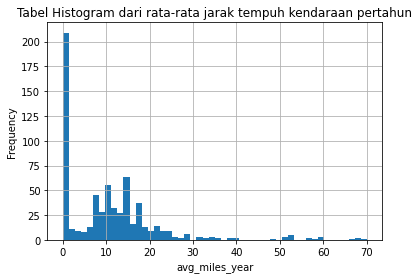

In [64]:
# Menampilkan histogram dari jarak tempuh kendaraan pertahun
data['avg_miles_year'].hist(bins=50, range=[0, 70])

# menambahkan judul dan nama sumbu 
plt.xlabel('avg_miles_year')
plt.ylabel('Frequency')
plt.title("Tabel Histogram dari rata-rata jarak tempuh kendaraan pertahun");

Histogram diatas menunjukkan sebaran data dalam column avg_miles_year dimana data tersebar dari kiri kekanan dengan nilai terbanyak pada nilai 0, dengan puncak tertinggi diatas 200 dengan rentang nilai dari 0 - 700. dapat disimpulkan data pada column rata-rata jarak tempuh kendaraan pertahun terdapat outlier dimana nilai maksimalnya adalah 200. 

In [65]:
# distribusi statistik pada data yang belum filter

data[['price','model_year', 'condition', 'cylinders', 'vehicle_age','days_listed', 'avg_miles_year']].describe()

,price,model_year,condition,cylinders,vehicle_age,days_listed,avg_miles_year
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000
mean,12132.464920,2009.816419,2.637535,6.121067,5.970383,39.55476,56672.042445
std,10040.803015,6.091605,0.712447,1.657457,6.386633,28.20427,60615.553841
min,1.000000,1908.000000,0.000000,3.000000,1.000000,0.00000,1.000000
25%,5000.000000,2007.000000,2.000000,4.000000,1.000000,19.00000,11888.000000
50%,9000.000000,2011.000000,3.000000,6.000000,3.000000,33.00000,20609.000000
75%,16839.000000,2014.000000,3.000000,8.000000,10.000000,53.00000,104231.000000
max,375000.000000,2019.000000,5.000000,12.000000,111.000000,271.00000,990001.000000


Dari visualisasi awal untuk mendeteksi outlier, kita dapat mengamati bahwa variabel harga, dan rata-rata jarak tempuh kendaraan pertahian memiliki outlier yang signifikan. Melihat variabel harga, mudah untuk mendeteksi outlier yang dihasilkan dari data yang salah. Harga minimum adalah 1 dan harga maksimum adalah 375.000. Demikian pula pada column, usia kendaraan dimana niai rata-ratanya adalah 6 tahun, sedangkan usia kendaraan maksimum adalah 111 tahun dimana standar deviasinya 6 tahun jelas terdapat outlier dalam variabel ini. Kita dapat melihat bahwa ada begitu banyak outlier dalam data sehingga kita harus menanganinya sebelum kita dapat melanjutkan dengan analisis.

## Mempelajari dan Menangani Outlier


Dengan menggunakan metode IQR  ukuran variabilitas yang didasarkan pada pembagian kumpulan data menjadi kuartil. Kuartil membagi kumpulan data terurut menjadi empat bagian yang sama besar. Nilai yang memisahkan bagian-bagian ini disebut kuartil pertama, kedua (median), dan ketiga yang masing-masing dilambangkan dengan Q1, Q2, dan Q3

dengan menggunakan metode ini kita dapat mendeteksi nilai atas dan bawah dari outlier serta memfilter data yang teridentifikasi berisi outlier. 

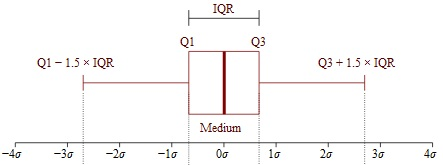

In [66]:
# fungsi menentukan batas bawah outlier

def lower_whisker(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    
    iqr = q3 - q1
    
    return q1 - 1.5 * iqr

In [67]:
# fungsi menentukan batas atas outlier

def upper_whisker(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    
    iqr = q3 - q1
    
    return q1 + 1.5 * iqr

In [68]:
# batas bawah column price 

lower_price = lower_whisker(data, 'price')
lower_price

-12758.5

In [69]:
# batas atas column price 

upper_price = upper_whisker(data, 'price')
upper_price

22758.5

In [70]:
# batas bawah column 'vehicle_age' 

lower_age = lower_whisker(data, 'vehicle_age')
lower_age

-12.5

In [71]:
# batas atas column 'vehicle_age'

upper_age = upper_whisker(data, 'vehicle_age')
upper_age

14.5

In [72]:
# batas bawah column 'odometer' 

lower_odometer = lower_whisker(data, 'odometer')
lower_odometer

-32561.5

In [73]:
# batas atas column 'odometer'

upper_odometer = upper_whisker(data, 'odometer')
upper_odometer

183897.5

In [74]:
# 
data_clean = data.query('(price > @lower_price and price < @upper_price) and (vehicle_age > @lower_age and vehicle_age < @upper_age) and (odometer > @lower_odometer and odometer < @upper_odometer)')

In [75]:
# distribusi statistik yang telah di filter nilai outliernya

data_clean.describe()

,price,model_year,condition,cylinders,odometer,days_listed,days,week,month,year,vehicle_age,avg_miles_year
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.00000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,9897.044005,2010.629763,2.683778,5.791866,105759.028876,39.55681,3.006674,26.927647,6.642140,2018.303730,4.509069,60286.473334
std,5596.726017,4.708463,0.673607,1.657915,41784.646569,28.37710,1.995006,15.108158,3.467112,0.459874,4.215061,54193.876295
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.00000,0.000000,1.000000,1.000000,2018.000000,1.000000,1.000000
25%,5500.000000,2008.000000,2.000000,4.000000,80000.000000,19.00000,1.000000,13.000000,3.000000,2018.000000,1.000000,13047.000000
50%,8988.000000,2011.000000,3.000000,6.000000,105669.000000,33.00000,3.000000,27.000000,7.000000,2018.000000,2.000000,26312.500000
75%,13995.000000,2014.000000,3.000000,8.000000,131861.500000,53.00000,5.000000,40.000000,10.000000,2019.000000,8.000000,104231.000000
max,22745.000000,2019.000000,5.000000,12.000000,183804.000000,271.00000,6.000000,52.000000,12.000000,2019.000000,14.000000,183764.000000


In [76]:
# distribusi statistik yang telah belum di filter nilai outliernya

data.describe()

,price,model_year,condition,cylinders,odometer,days_listed,days,week,month,year,vehicle_age,avg_miles_year
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.816419,2.637535,6.121067,115199.014508,39.55476,3.005434,26.873498,6.628491,2018.307462,5.970383,56672.042445
std,10040.803015,6.091605,0.712447,1.657457,60484.863376,28.20427,1.997759,15.138854,3.474134,0.461447,6.386633,60615.553841
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.00000,0.000000,1.000000,1.000000,2018.000000,1.000000,1.000000
25%,5000.000000,2007.000000,2.000000,4.000000,75668.000000,19.00000,1.000000,13.000000,3.000000,2018.000000,1.000000,11888.000000
50%,9000.000000,2011.000000,3.000000,6.000000,110908.000000,33.00000,3.000000,27.000000,7.000000,2018.000000,3.000000,20609.000000
75%,16839.000000,2014.000000,3.000000,8.000000,147821.000000,53.00000,5.000000,40.000000,10.000000,2019.000000,10.000000,104231.000000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.00000,6.000000,52.000000,12.000000,2019.000000,111.000000,990001.000000


Setelah menentukan nilai atas dan bawah dari data outlier dapat dilihat pada distribusi statistik pada column price dimna nilai  min nya sebesar 12774 dan nilai maks 22745, serta column model year dimana nilai min 1997 dan nilai maks 2017. dll.

## Mempelajari Parameter Inti Tanpa Outlier

Membuat grafik histogram dengan data yang telah difilter dan membandingkan dengan histogram yang masih memiliki nilai yang outlier serta kesimpulan masing-masing value perbandingan valuenya.

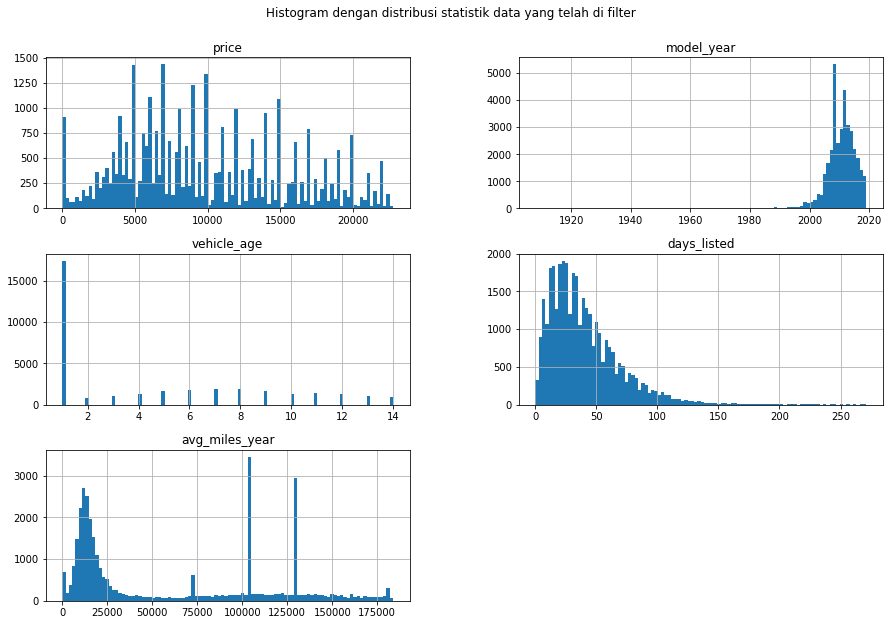

In [77]:
# Histogram dengan value yang telah difilter 

data_clean[['price', 'model_year', 'vehicle_age','days_listed', 'avg_miles_year']].hist(bins=100, figsize=(15, 10))
plt.suptitle('Histogram dengan distribusi statistik data yang telah di filter', y=0.95);

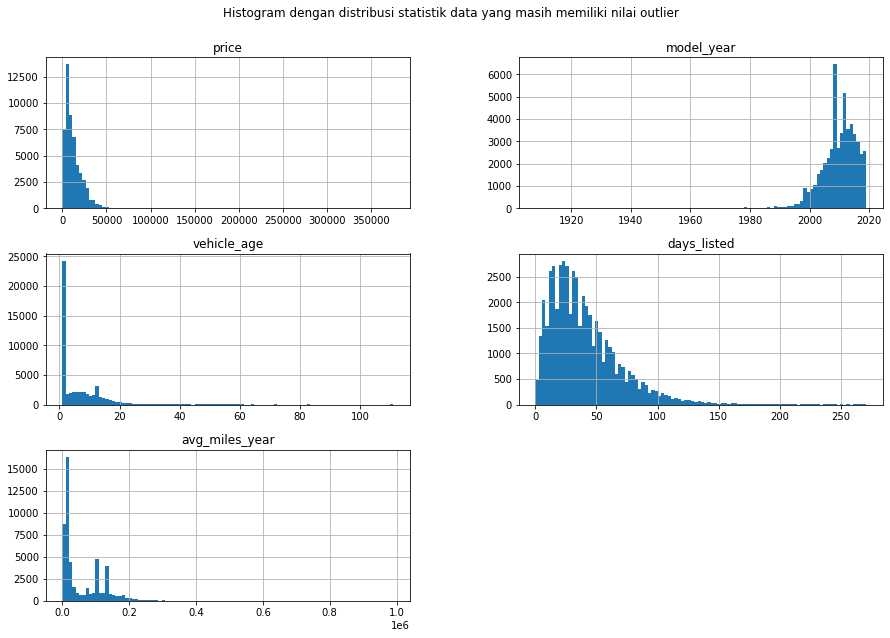

In [78]:
# Histogram dengan value yang masih memiliki nilai outlier 

data[['price', 'model_year', 'vehicle_age','days_listed', 'avg_miles_year']].hist(bins=100, figsize=(15, 10))
plt.suptitle('Histogram dengan distribusi statistik data yang masih memiliki nilai outlier', y=0.95);

Kesimpulan :

1. Dengan menggunakan metode statistik IQR untuk menentukan distribusi nilai baku untuk menentukan rentang data normal dimana nilai nya dibagi menjadi 3 kuartil yakni q1 untuk nilai bawah , q2 untuk median, dan q3 untuk batas atas dari nilai outlier nya. sehingga sebaran data menjadi normal. 

2. Dapat dilihat dari sebaran data pada perbandingan histogram diatas, histogram yang telah di tentukan upper dan lower outliernya pada column price dimana sebaran datanya 5000 hingga 22745, dan data yang belum di tentukan nilai upper dan lower outliernya pada column price dimana sebaran datanya terbentang dari 0 hingga 375000. 


## Masa Berlaku Iklan

Analisis berapa hari iklan ditayangkan pada column days_listed

In [79]:
# Ditribusi statistik data pada column days_listed
data_clean['days_listed'].describe()

count    35064.00000
mean        39.55681
std         28.37710
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

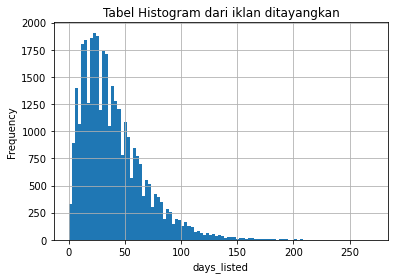

In [80]:
# Tabel Histogram dari iklan ditayangkan pada column days listed
data_clean['days_listed'].hist(bins=100)

# menambahkan judul dan nama sumbu 
plt.xlabel('days_listed')
plt.ylabel('Frequency')
plt.title("Tabel Histogram dari iklan ditayangkan");

In [81]:
# Melihat nilai mean dan median pada column days_listed

print('Nilai mean saat iklan ditayangkan adalah {:.2f} hari dan mediannya adalah {:.1f} hari'
      .format(data_clean['days_listed'].mean(), data_clean['days_listed'].median()))

Nilai mean saat iklan ditayangkan adalah 39.56 hari dan mediannya adalah 33.0 hari


Kesimpulan :

1. Histogram di atas menunjukkan distribusi rentang nilai dari iklan pada kendaraan, dimana rentang nilai yang tersebar dengan nilai minimun 0 hari dan maksimum 271 hari setelah nilai outliernya di filter.  

2. kita dapat melihat pada column diatas bahwa rata-rata waktu iklan ditayangkan adalah 39 hari dan mediannya adalah 33 hari.

3. Secara umum jika kita melihat nilai pada median dan mean dimana pada umumnya iklan ditayangkan sekitar 1 bulan yakni di rentang nilai 33 hari dan 39 hari. 

4. Untuk memastikan rentang nilai minimum dan nilai maksimum pada column days_listed, sebaiknya kita mengidentifikasi dengan melakukan filter data berdasarkan column dengan nilai-nilai yang lebih memungkinkan dalam penarikan kesimpulan.

In [82]:
# mengidentifikasi jumlah rata-rata hari iklan ditayangkan hingga dihapus dengan harga kendaraan 

ads_price = data_clean.pivot_table(index='days_listed', values='price', aggfunc=['mean', 'median', 'count'])
print(ads_price)

                     mean   median count
                    price    price price
days_listed                             
0            10649.093750  10247.5    32
1            10168.482759   8997.0   116
2            10655.735955   9475.0   178
3            10191.481343   9599.5   268
4             9790.897163   8500.0   282
...                   ...      ...   ...
252          11500.000000  11500.0     1
256           8980.000000   8980.0     1
261           3800.000000   3800.0     1
267           5500.000000   5500.0     1
271           5200.000000   5200.0     1

[219 rows x 3 columns]


In [83]:
# mengidentifikasi jumlah rata-rata hari iklan ditayangkan hingga dihapus dengan model kendaraan 

ads_modelCar = data_clean.pivot_table(index='days_listed', values='model_year', aggfunc=['mean', 'median', 'count'])
print(ads_modelCar)

                    mean     median      count
              model_year model_year model_year
days_listed                                   
0            2010.656250     2010.5         32
1            2010.905172     2012.0        116
2            2011.286517     2012.0        178
3            2010.869403     2011.0        268
4            2009.631206     2010.5        282
...                  ...        ...        ...
252          2017.000000     2017.0          1
256          2012.000000     2012.0          1
261          2012.000000     2012.0          1
267          2011.000000     2011.0          1
271          2011.000000     2011.0          1

[219 rows x 3 columns]


Kesimpulan : 

1. Dengan mengidentifikasi jumlah rata-rata hari iklan ditayangkan hingga dihapus dengan harga kendaraan dan model year, dapat ditarik kesimpulan bahwa batas tercepat iklan dihapus pada 0 hari dan iklan terlama di tayangkan pada 271 hari. dengan hipotesis ini mari kita filter dengan metode pengindeksaan boleean yakni query. dengan menampilkan iklan dengan waktu tercepat dan iklan dengan waktu yang tercepat.

In [84]:
# Menampilkan iklan dengan waktu pada rata - rata

print('Jumlah iklan dengan waktu tercepat : {:.1f} '.format(len(data_clean.query('days_listed > 0 and days_listed < 39'))))

Jumlah iklan dengan waktu tercepat : 20373.0 


In [85]:
# Menampilkan iklan dengan waktu tercepat

print('Jumlah iklan dengan waktu tercepat : {:.1f} '.format(len(data_clean.query('days_listed == 0'))))

Jumlah iklan dengan waktu tercepat : 32.0 


In [86]:
# Menampilkan iklan dengan waktu terlama

print('Jumlah iklan dengan waktu terlama : {:.1f} '.format(len(data_clean.query('days_listed == 271'))))

Jumlah iklan dengan waktu terlama : 1.0 


Kesimpulan :

1. Dari analisa jumlah hari iklan ditampilkan, kita dapat melihat bahwa waktu iklan di tampilkan pada dengan menggunakan mean pada column days_listed dengan jumlah 20373. iklan dengan waktu tercepat didapat denga mefilter data dimana kendaraan yang laku pada waktu kurang dari 1 hari dengan jumlah 32 kemungkinan ini dapat terjadi dikarenakan kemungkinan kendaraan terjual pada hari yang sama dan kemungkinan lainnya. untuk iklan dengan waktu terlama dengan memfilter iklan yang waktunya lebih dari 271 hari berjumlah 1. 


## Harga Rata-Rata Setiap Jenis Kendaraan

Grafik Analisis Jumlah iklan dan harga rata-rata setiap jenis kendaraan, serta ketergantungan jumlah iklan pada jenis kendaraan. berdasarkan 2 jenis kendaraan dengan jumlah iklan yang paling banyak.

In [87]:
# filter data berdasarkan jumlah iklan dengan harga rata-rata kendaraan 

avg_priceType = data_clean.groupby(['type']).agg({'price' : 'mean', 'days_listed' : 'count'}).sort_values(by=['days_listed'], ascending=False).reset_index().head(5)
avg_priceType

,type,price,days_listed
0,sedan,7353.020677,10640
1,SUV,9978.551449,9009
2,truck,12890.936043,6520
3,pickup,12720.132534,3501
4,coupe,10814.170497,1349


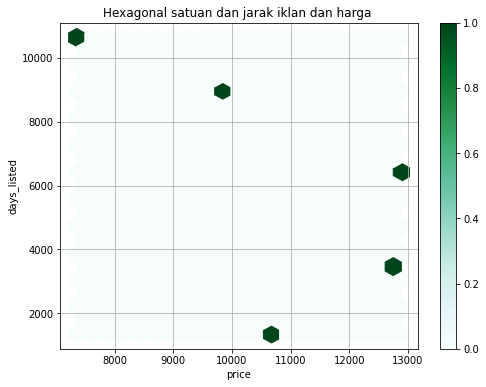

In [88]:
# Grafik hex berdasarkan ketergantungan jumlah hari iklan ditayangkan dengan harga rata-rata untuk setiap jenis kendaraan.

avg_priceType.plot(x='price', y='days_listed', title='Hexagonal satuan dan jarak iklan dan harga ', 
               kind='hexbin', gridsize=20, figsize=(8,6), sharex=False, grid=True
);

Kesimpulan :    

1. Pada diagram hexagonal diatas terdapat hubungan negatif yang rendah dikarenakan titik yang tersebar menjauhi garis lurus pada Analisis Jumlah iklan dan harga rata-rata setiap jenis kendaraan dimana puncak tertinggi sumbu = y iklan ditayangkan adalah lebih dari 10000 pada iklan yang ditayangkan  dari rentang sumbu = x data harga 0 sd 8000. 

2. Setelah menganalisa keterkaitan jumlah iklan dan rata-rata harga untuk setiap jenis kendaraan, dari hasil analisis jumlah hari iklan ditampilkan dimana dengan mengelompokkan data yang telah dihilangkan outliernya lalu melihat rata-rata dari harga dan jumlah hari dimana kendaraan ditampilkan,  maka didapatlah hasil dengan jenis kendaraan pada jumlah iklan terbanyak berdasarkan harga rata-rata ialah SUV dan Sedan. selanjutnya untuk menemukan keterkaitan / korelasi pada data untuk membantu menjawab pertanyaan bisnis dalam menentukan faktor-faktor apa saja yang mempengaruhi harga kendaraan. 

## Faktor Harga

Menganalisa jenis kendaraan dengan jumlah rata-rata harga terbanyak apakah terdapat keterkaitan / korelasi pada column: 
1.   Usia = vehicle_age (numerical) scatterplot
2.   Jarak Tempuh = odometer (numerical) scatterplot
3.   Kondisi = condition (kategorical) boxplot
4.   Tipe Transmisi = transmission (kategorical) boxplot
5.   Warna Kendaraan = paint color (kategorical) boxplot





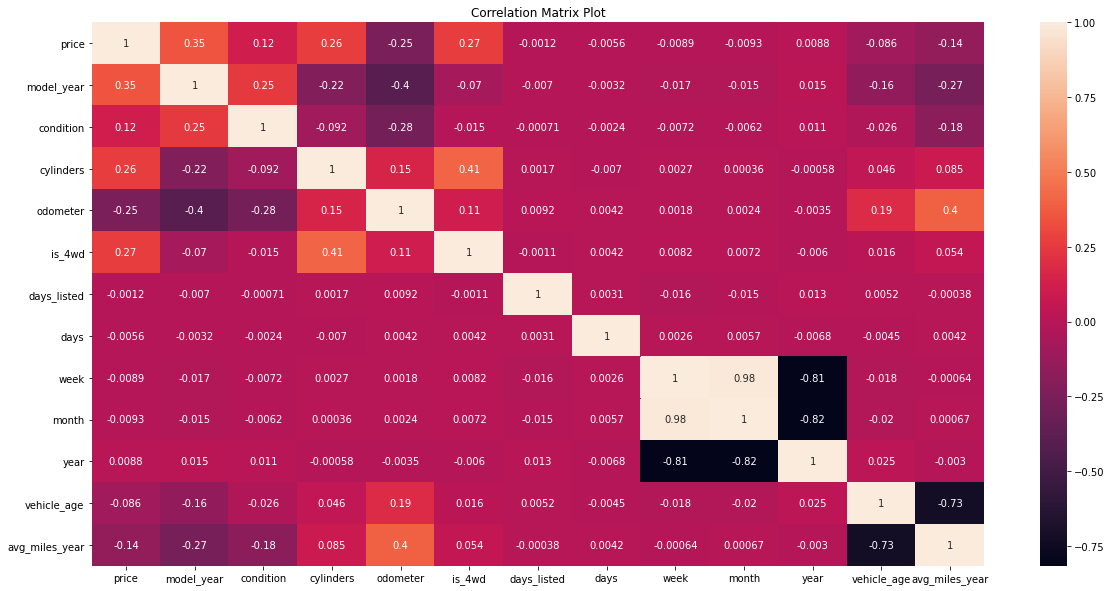

In [89]:
# Membuat Matriks korelasi d
corrMatriks = data_clean.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corrMatriks, annot=True)
plt.title('Correlation Matrix Plot')
plt.show()

analisis awal dapat dilihat dari grafik korelasi matrix diatas: 

1. faktor yang mempengaruhi harga kendaraan dengan korelasi positif yang lemah adalah model_year dengan nilai sebesar 0.54, condition dengan nilai 0.12, cylinders 0.26, is_4wd 0.27  

3. adapun faktor lain yang korelasinya negatif adalah days_listed, vehicle age, avg_miles_year.

Langkah selanjunya : kita akan mengelompokkan jenis kendaraan yang populer untuk menganalisa apakah harga mempunyai keterkaitan / korelasi pada usia, jarak tempuh, kondisi, tipe transmisi, dan warnanya. (tipe data kategorical)

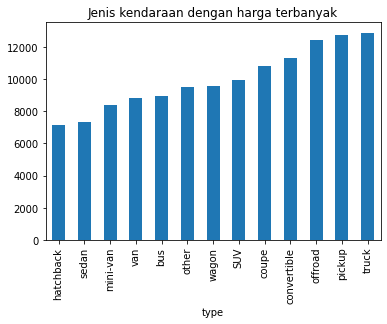

In [90]:
# Mengelompokkan jenis kendaraan dengan harga kendaraan

(data_clean.groupby('type')['price'].mean().sort_values().plot(kind='bar', title='Jenis kendaraan dengan harga terbanyak'));

In [91]:
# Menampilkan distribusi data statistik pada jenis kendaraan dengan harga kendaraan 

vehicle_type = data_clean.groupby('type')['price'].describe().sort_values('mean', ascending=False).reset_index()
vehicle_type

,type,count,mean,std,min,25%,50%,75%,max
0,truck,6520.0,12890.936043,5936.632797,1.0,8500.0,13900.0,17900.00,22745.0
1,pickup,3501.0,12720.132534,5885.569218,1.0,7995.0,12900.0,17900.00,22700.0
2,offroad,100.0,12418.410000,5650.142451,15.0,8475.0,12500.0,16923.75,22000.0
3,convertible,231.0,11340.255411,5791.299277,1.0,6993.0,11000.0,15997.50,22300.0
4,coupe,1349.0,10814.170497,6650.249186,1.0,4995.0,9990.0,17300.00,22500.0
5,SUV,9009.0,9978.551449,5368.963135,1.0,5990.0,8995.0,13995.00,22692.0
6,wagon,1223.0,9544.427637,4764.530154,188.0,5992.5,8400.0,12995.00,22490.0
7,other,183.0,9526.163934,4284.225057,1000.0,6000.0,8995.0,12149.00,22500.0
8,bus,4.0,8975.000000,1495.270321,7500.0,7800.0,8950.0,10125.00,10500.0
9,van,464.0,8829.614224,4780.662625,1.0,5699.0,7995.0,11405.00,21805.0


Pada tahap ini saya mengelompokkan jenis kendaraan dengan rata-rata harga, dengan mengambil sampel 5 jenis kendaraan dengan harga rata-rata terbanyak maka disini kita akan membuat variable baru dengan 5 jenis kendaraan populer yakni : truck, pickup, offroad, convertible, coupe. 

In [92]:
# Memuat dan menampilkan variable baru dengan jenis kendaraan dengan rata-rata harga terbanyak

most_type5_pric = data_clean[data_clean.type.isin(['bus', 'truck', 'pickup', 'offroad', 'coupe'])]
most_type5_pric.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days,week,month,year,vehicle_age,avg_miles_year
3,1500.0,2003,ford f-150,1,8,gas,181613.0,automatic,pickup,others,False,2019-03-22,9,4,12,3,2019,1,181614
10,19500.0,2011,chevrolet silverado 1500,3,8,gas,128413.0,automatic,pickup,black,True,2018-09-17,38,0,38,9,2018,8,16052
12,18990.0,2012,ram 1500,3,8,gas,140742.0,automatic,pickup,others,True,2019-04-02,37,1,14,4,2019,1,140743
15,17990.0,2013,ram 1500,3,8,gas,104230.0,automatic,pickup,red,True,2018-05-15,111,1,20,5,2018,1,104231
16,14990.0,2010,ram 1500,3,8,gas,130725.0,automatic,pickup,red,True,2018-12-30,13,6,52,12,2018,9,14526


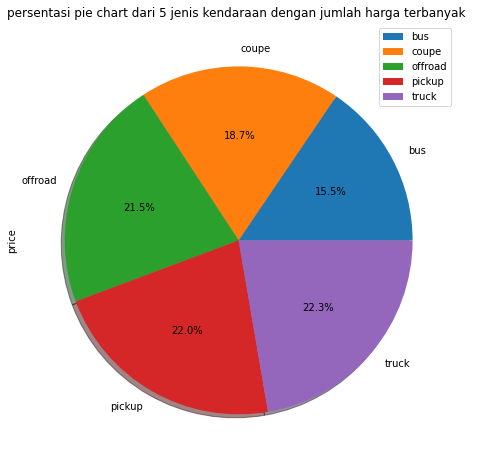

In [93]:
# Menampilkan persentasi dari jenis kendaraan dengan jumlah harga terbanyak 

(most_type5_pric.pivot_table(index='type', values='price', aggfunc=['count', 'mean'])
     .plot(y='mean', kind='pie', 
           title = 'persentasi pie chart dari 5 jenis kendaraan dengan jumlah harga terbanyak ', 
           figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);

pada grafik pie chart ini dapat diketahui bahwa jenis kendaraan dengan rata-rata jumlah harga terbanyak terdapat pada jenis kendaraan truck sebesar 22.3%, diikuti dengan jenis kendaraan pickup sebesar 22.0%

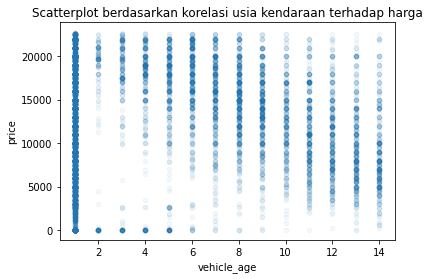

In [94]:
# Korelasi 5 jenis kendaraan dengan rata-rata harga terbanyak dan usia kendaraan 

most_type5_pric.plot.scatter(x='vehicle_age', y='price', title='Scatterplot berdasarkan korelasi usia kendaraan terhadap harga', alpha=0.05);

Kesimpulan : dari hasil analisa korelasi pada scatterplot diatas terdapat korelasi negatif pada keterkaitan antara harga dengan usia kendaraan dimana pencaran titik semakin melebar. serta semakin tua kendaraan maka semakin rendah harganya sementara mobil baru diantara kurang dari lima tahun memiliki harga yang tinggi.

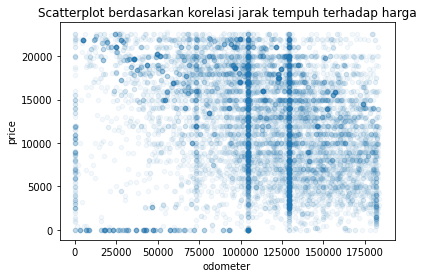

In [95]:
# Korelasi  jenis kendaraan dengan rata-rata harga terbanyak dengan jarak tempuh  

most_type5_pric.plot.scatter(x='odometer', y='price', title='Scatterplot berdasarkan korelasi jarak tempuh terhadap harga', alpha=0.05);

Kesimpulan : dari hasil analisa pada scatterplott diatas terdapat korelasi negatif dimana titik tersebar dari atas kiri ke kanan bawah, dimana titik berkonsetrasi padat pada nilai odometer diantara 100000 dan 125000.

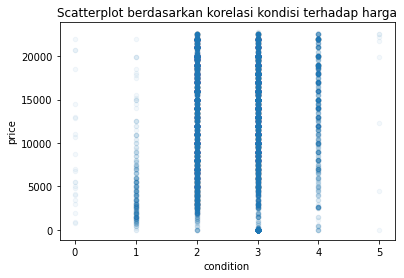

In [96]:
 # Korelasi  jenis kendaraan dengan rata-rata harga terbanyak dengan kondisi kendaraan dengan lebih 50 iklan ditampilkan.

most_type5_pric.plot.scatter(x='condition', y='price', title='Scatterplot berdasarkan korelasi kondisi terhadap harga', alpha=0.05);    


Kesimpulan pada grafik scatter diatas terhadap kondisi kendaraan terhadap harga terdapat korelasi positif lemah dimana kemiringan titik dari bawah kiri ke atas kanan, dimana konsentrasi titik yang padat pada angka 2 =  good, dan angka 3 = excellent. 

Buatlah grafik boxplot untuk variabel kategorik (jenis transmisi dan warna),Ketika menganalisis variabel kategorik, ingatlah bahwa kategori harus memiliki setidaknya 50 iklan. Jika tidak, parameternya tidak akan valid untuk digunakan saat analisis.

In [97]:
# melihat value pada jenis transmisi apakah mempunyai nilai yang lebih dari 50

most_type5_pric['transmission'].value_counts()

automatic    10092
other          739
manual         643
Name: transmission, dtype: int64

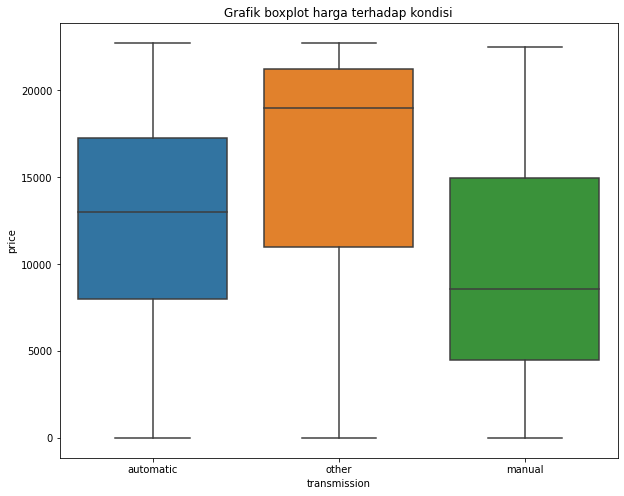

In [98]:
# Analisis  5 jenis kendaraan dengan rata-rata harga terbanyak dengan tipe transmisi.

plt.figure(figsize=(10,8))
sns.boxplot(data=most_type5_pric, y='price', x='transmission')

plt.title('Grafik boxplot harga terhadap kondisi')
plt.suptitle("")
plt.show()

Kesimpulan : 

1. Dengan melihat value pada column tipe transmission dimana terdapat categori automatic, other transmissiondan manual dimana semua category mempunyai lebih dari 50 value.


2. Kesimpulan dari boxplot dimana tipe transmisi kendaraan "others transmission" lebih tinggi dibandingkan dengan manual dan automatic. dimana jenis transmisi yang laku pada tipe others transmissi ada pada kisaran 20000 dan diurutan kedua dengan tipe transmisi automatic pada kisaran harga diatas 15000 dan urutan ketiga manual pada kisaran harga dibawah 15000. dengan ini rata-rata kendaraan dengan transmisi other transmission lebih mahal dari kendaraan dengan transmisi automatic dan manual, sehingga jenis transmisi berpengaruh besar terhadap harga.

In [99]:
# melihat value pada warna pada kendaraan apakah mempunyai nilai yang lebih dari 50

most_type5_pric['paint_color'].value_counts()

white     3005
others    2342
black     1456
red       1087
silver    1046
grey       936
blue       843
custom     215
green      214
brown      196
yellow      79
orange      42
purple      13
Name: paint_color, dtype: int64

In [100]:
# Filter column paint_color yang datanya kurang dari 50 

paint_filter  =  most_type5_pric[most_type5_pric.paint_color.isin(['white','others','black','red','silver','grey','blue','custom','green','brown','yellow'])]
paint_filter['paint_color'].value_counts()

white     3005
others    2342
black     1456
red       1087
silver    1046
grey       936
blue       843
custom     215
green      214
brown      196
yellow      79
Name: paint_color, dtype: int64

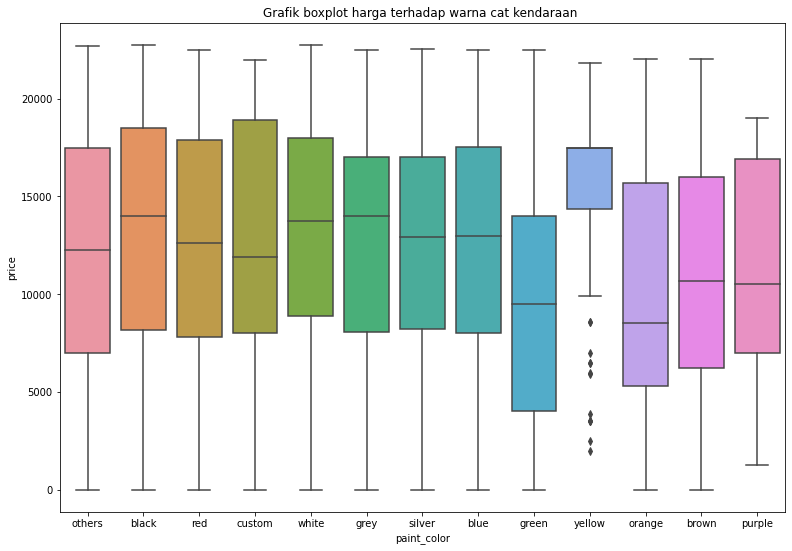

In [101]:
# Analisis  5 jenis kendaraan dengan rata-rata harga terbanyak dengan tipe warna_kendaraan.

plt.figure(figsize=(13,9))
sns.boxplot(data=most_type5_pric, y='price', x='paint_color')

plt.title('Grafik boxplot harga terhadap warna cat kendaraan ')
plt.suptitle("")
plt.show()

Kesimpulan : 

1. Dengan melihat value pada column paint_color yang memiliki nilai diatas 50 adalah white, others, black, red, silver, grey, blue, custom, green, brown, yellow.

2. Pada boxplot  diatas rata-rata hampir memiliki harga yang hampir sama akan tetapi jika dilihat dengan detail warna dengan harga tertinggi ada pada warna costum, kedua = black, ketiga = white, keempat = red dan kelima others. jadi dapat disimpulkan warna tidak dapat dijadikan acuan untuk harga.

## Kesimpulan Umum :     
---
1. Pra-pemrosesan
Dimulai dari tahap pra-pemrosesan data, dapat didentifikasi missing value dalam data dan missing value tersebut hilang secara acak (MAR). disini saya menggunakan beberapa metode untuk menangani missing value berdasarkan kasus perkasus.
---
2. Mengatasi Nilai-Nilai yang Hilang (Jika Ada)
*   pada column model_year dan silinder saya menghapus nilai yang hilang dengan metode dropna() 
*   Pada column odometer saya mengganti nilai yang hilang dengan median.
*   Pada column pain_color saya membuat kategori baru yakni others.
---
3. Memperbaiki Tipe Data
*   Pada poin ini saya melakukan perubahan pada tipe data yakni dari float64 menjadi int64, column yang tipe datanya perlu dirubah adalah model_year, cylinders, odometer dan is_4wd. alasan perubahan tipe data ini dikarenakan pada saat melakukan aritmatika lebih baik menggunakan bilangan bulat dari pada pecahan atau desimal.
*   Pada Poin ini saya menambahkan untuk mempermudah anilisi pada data :
a. Hari, minggu, bulan, dan tahun kendaraan saat iklan ditayangkan
b. Usia kendaraan (dalam tahun) ketika iklan ditayangkan
c. Jarak tempuh rata-rata kendaraan per tahun
b. Mengganti nilai string dengan skala numerik pada column condition
---
4. Mempelajari Parameter Inti pada column :
*   Pada tahap ini saya melakukan analisis pada column Harga, Usia, kendaraan ketika iklan ditayangkan, Jarak tempuh, Jumlah silinder, Kondisi dan mendapati data yang anomali  yang sebagian besar terdapat outlier dengan kemiringan puncak kiri ke kanan. 
---
5. Mempelajari Parameter Inti Tanpa Outlier :     
*   Pada tahap ini saya melakukan metode Zscore untuk menentukan range data agar distribusi datanya normal setelah itu memfilter data dengan menghilangkan data yang outlier dan dilanjutkan menganalisa data dengan membuat histogram baru. 
---
6. Masa Berlaku Iklan
*  Dari analisis yang dilakukan saya menemukan bahwa masa pakai iklan biasanya sekitar satu bulan. lalu iklan tercepat yang dihapus sebelum 1 hari, dan iklan terlama yang terdaftar selama 271 hari.
---
7. Pada tahap analisis terakhir jenis kendaraan bus dan hatchback adalah jumlah iklan yang paling banyak ditayangkan. disini saya mengelompokkan dan menganalisis lebih dalam tentang faktor apa saja yang mempengaruhi harga kendaraan. dan dari hasil analisis bahwa variabel- variabel di bawah ini merupakan faktor penting dari harga kendaraan:

*   Condition = kondisi kendaraan 
*   Transmission = Tipe transmisi